In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('customer_data_TP2.csv', index_col=False)

In [3]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,"2022-01-08, 2022-01-20, 2022-03-23, 2022-06-12...",2022-12-08
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,2021-03-11,2021-06-18,2021-06-18
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,2021-06-18,2022-01-06,2022-01-06
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,2021-03-28,"2021-04-25, 2021-06-22, 2021-07-11, 2021-09-07...",2022-03-13
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,2021-05-22,"2021-07-02, 2021-08-30, 2021-12-09, 2022-01-04...",2022-04-22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   100000 non-null  int64 
 1   age                  100000 non-null  int64 
 2   gender               100000 non-null  object
 3   income               100000 non-null  int64 
 4   education            100000 non-null  object
 5   region               100000 non-null  object
 6   loyalty_status       100000 non-null  object
 7   purchase_frequency   100000 non-null  object
 8   purchase_amount      100000 non-null  int64 
 9   product_category     100000 non-null  object
 10  promotion_usage      100000 non-null  int64 
 11  satisfaction_score   100000 non-null  int64 
 12  first_purchase_date  100000 non-null  object
 13  purchase_dates       100000 non-null  object
 14  last_purchase_date   100000 non-null  object
dtypes: int64(6), object(9)
memory usage

In [5]:
for x in data.columns: 
    print(x)
    print(data[x].values)

id
[     1      2      3 ...  99998  99999 100000]
age
[27 29 37 ... 29 31 35]
gender
['Male' 'Male' 'Male' ... 'Male' 'Female' 'Female']
income
[40682 15317 38849 ... 13222 40093 22249]
education
['Bachelor' 'Masters' 'Bachelor' ... 'College' 'Bachelor' 'College']
region
['East' 'West' 'West' ... 'West' 'West' 'West']
loyalty_status
['Gold' 'Regular' 'Silver' ... 'Regular' 'Regular' 'Silver']
purchase_frequency
['frequent' 'rare' 'rare' ... 'frequent' 'frequent' 'rare']
purchase_amount
[18249  4557 11822 ...  5152 16312  9426]
product_category
['Books' 'Clothing' 'Clothing' ... 'Clothing' 'Health' 'Health']
promotion_usage
[0 1 0 ... 0 1 0]
satisfaction_score
[6 6 6 ... 5 5 6]
first_purchase_date
['2021-12-22' '2021-03-11' '2021-06-18' ... '2021-06-17' '2021-07-28'
 '2021-05-08']
purchase_dates
['2022-01-08, 2022-01-20, 2022-03-23, 2022-06-12, 2022-06-16, 2022-07-02, 2022-09-18, 2022-11-01, 2022-11-14, 2022-11-30, 2022-12-08'
 '2021-06-18' '2022-01-06' ...
 '2021-06-27, 2021-07-11, 20

In [6]:
df = data.copy()

In [7]:
df.isnull().sum()

id                     0
age                    0
gender                 0
income                 0
education              0
region                 0
loyalty_status         0
purchase_frequency     0
purchase_amount        0
product_category       0
promotion_usage        0
satisfaction_score     0
first_purchase_date    0
purchase_dates         0
last_purchase_date     0
dtype: int64

In [8]:
df.shape

(100000, 15)

In [9]:
df.to_csv('customer_data_TP2_전처리완료.csv', index=False)

In [10]:
# purchase_dates 열이 쉼표로 구분된 날짜 문자열일 경우, 이를 분리
df['purchase_dates'] = df['purchase_dates'].apply(lambda x: x.split(', '))

# 각 날짜를 개별 행으로 나누기 (explode 사용)
df = df.explode('purchase_dates')

# 날짜 타입 변환
df['purchase_dates'] = pd.to_datetime(df['purchase_dates'], errors='coerce')

In [11]:
df['purchase_month']=df['purchase_dates'].dt.date

In [12]:
df.tail()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date,purchase_month
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2021-12-20,2022-07-13,2021-12-20
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2021-12-30,2022-07-13,2021-12-30
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2022-02-02,2022-07-13,2022-02-02
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2022-07-13,2022-07-13,2022-07-13
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6,2021-05-08,2021-10-14,2021-10-14,2021-10-14


In [13]:
#고객의 첫 구매 날짜
### Get Cohort Month
df['first_purchase_Date'] = df.groupby('id')['purchase_month'].transform('min')

In [14]:
#고객의 마지막 구매 날짜
df['last_purchase_Date'] = df.groupby('id')['purchase_month'].transform('min')

In [15]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date,purchase_month,first_purchase_Date,last_purchase_Date
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,2022-01-08,2022-12-08,2022-01-08,2022-01-08,2022-01-08
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,2022-01-20,2022-12-08,2022-01-20,2022-01-08,2022-01-08
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,2022-03-23,2022-12-08,2022-03-23,2022-01-08,2022-01-08
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,2022-06-12,2022-12-08,2022-06-12,2022-01-08,2022-01-08
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-22,2022-06-16,2022-12-08,2022-06-16,2022-01-08,2022-01-08


In [16]:
df.tail()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date,purchase_month,first_purchase_Date,last_purchase_Date
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2021-12-20,2022-07-13,2021-12-20,2021-07-29,2021-07-29
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2021-12-30,2022-07-13,2021-12-30,2021-07-29,2021-07-29
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2022-02-02,2022-07-13,2022-02-02,2021-07-29,2021-07-29
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5,2021-07-28,2022-07-13,2022-07-13,2022-07-13,2021-07-29,2021-07-29
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6,2021-05-08,2021-10-14,2021-10-14,2021-10-14,2021-10-14,2021-10-14


In [17]:
## Check value 
df[df['id'] == '12680'][['purchase_month', 'first_purchase_date']].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df[df['id'] == '17850'][['purchase_month', 'first_purchase_date']].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
df.dtypes

id                              int64
age                             int64
gender                         object
income                          int64
education                      object
region                         object
loyalty_status                 object
purchase_frequency             object
purchase_amount                 int64
product_category               object
promotion_usage                 int64
satisfaction_score              int64
first_purchase_date            object
purchase_dates         datetime64[ns]
last_purchase_date             object
purchase_month                 object
first_purchase_Date            object
last_purchase_Date             object
dtype: object

In [20]:
df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'], errors='coerce')
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], errors='coerce')

In [21]:
df.dtypes

id                              int64
age                             int64
gender                         object
income                          int64
education                      object
region                         object
loyalty_status                 object
purchase_frequency             object
purchase_amount                 int64
product_category               object
promotion_usage                 int64
satisfaction_score              int64
first_purchase_date    datetime64[ns]
purchase_dates         datetime64[ns]
last_purchase_date     datetime64[ns]
purchase_month                 object
first_purchase_Date            object
last_purchase_Date             object
dtype: object

In [22]:
### Change FirstOrderDate to dataframe dtype
df['purchase_month'] = pd.to_datetime(df['purchase_month'])
df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'])
# 월의 첫째날 가져오기 
df['purchase_month'] = df['purchase_month'].dt.to_period('M').dt.to_timestamp()
df['first_purchase_date'] = df['first_purchase_date'].dt.to_period('M').dt.to_timestamp()

In [23]:
df.dtypes

id                              int64
age                             int64
gender                         object
income                          int64
education                      object
region                         object
loyalty_status                 object
purchase_frequency             object
purchase_amount                 int64
product_category               object
promotion_usage                 int64
satisfaction_score              int64
first_purchase_date    datetime64[ns]
purchase_dates         datetime64[ns]
last_purchase_date     datetime64[ns]
purchase_month         datetime64[ns]
first_purchase_Date            object
last_purchase_Date             object
dtype: object

In [24]:
df['first_purchase_date'].value_counts()

first_purchase_date
2021-03-01    34003
2020-12-01    33030
2021-05-01    32835
2021-07-01    32697
2021-08-01    32689
2021-11-01    32685
2021-10-01    32606
2021-04-01    32449
2021-06-01    32361
2021-12-01    32093
2021-01-01    31696
2021-09-01    31571
2021-02-01    29779
Name: count, dtype: int64

In [25]:
df[['first_purchase_date']].value_counts()

first_purchase_date
2021-03-01             34003
2020-12-01             33030
2021-05-01             32835
2021-07-01             32697
2021-08-01             32689
2021-11-01             32685
2021-10-01             32606
2021-04-01             32449
2021-06-01             32361
2021-12-01             32093
2021-01-01             31696
2021-09-01             31571
2021-02-01             29779
Name: count, dtype: int64

In [26]:
df[df['first_purchase_date'] == '2022-12-01'][['first_purchase_date','purchase_month']].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
df['CohortIndex'] = (
    (df['purchase_month'].dt.year - df['first_purchase_date'].dt.year) * 12 +
    (df['purchase_month'].dt.month - df['first_purchase_date'].dt.month) #+ 1
)

In [28]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date,purchase_month,first_purchase_Date,last_purchase_Date,CohortIndex
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-01,2022-01-08,2022-12-08,2022-01-01,2022-01-08,2022-01-08,1
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-01,2022-01-20,2022-12-08,2022-01-01,2022-01-08,2022-01-08,1
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-01,2022-03-23,2022-12-08,2022-03-01,2022-01-08,2022-01-08,3
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-01,2022-06-12,2022-12-08,2022-06-01,2022-01-08,2022-01-08,6
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,2021-12-01,2022-06-16,2022-12-08,2022-06-01,2022-01-08,2022-01-08,6


In [29]:
df[df['id'] == '24957'][['purchase_month', 'first_purchase_date','CohortIndex']]

,purchase_month,first_purchase_date,CohortIndex


In [30]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score,first_purchase_date,purchase_dates,last_purchase_date,purchase_month,CohortIndex
count,420494.000000,420494.000000,420494.000000,420494.000000,420494.000000,420494.000000,420494,420494,420494,420494,420494.000000
mean,49979.865030,30.021399,27513.078864,9633.882281,0.300342,5.007831,2021-06-01 13:23:32.298867712,2021-12-15 21:54:46.893987072,2022-04-17 11:13:09.545629440,2021-12-01 04:36:21.434217728,6.004804
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-01 00:00:00,0.000000
25%,25072.250000,27.000000,16293.000000,5583.250000,0.000000,4.000000,2021-03-01 00:00:00,2021-08-27 00:00:00,2022-01-09 00:00:00,2021-08-01 00:00:00,3.000000
50%,49868.000000,30.000000,27512.000000,9436.000000,0.000000,5.000000,2021-06-01 00:00:00,2021-12-16 00:00:00,2022-04-19 00:00:00,2021-12-01 00:00:00,6.000000
75%,75022.750000,33.000000,38765.000000,13352.000000,1.000000,6.000000,2021-09-01 00:00:00,2022-04-06 00:00:00,2022-08-02 00:00:00,2022-04-01 00:00:00,9.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000,2021-12-01 00:00:00,2022-12-29 00:00:00,2022-12-29 00:00:00,2022-12-01 00:00:00,12.000000
std,28825.012447,4.472174,12989.963154,4793.806159,0.458407,1.041227,NaN,NaN,NaN,NaN,3.478625


In [31]:
#각 코호트의 월별 활성과 고객수 계산
cohort_counts = (
    df.groupby(['first_purchase_date', 'CohortIndex'])['id']
    .nunique() #각 그룹의 고유 고객 수(CustomerID)를 직접 계산)
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_date,,,,,,,,,,,,,
2020-12-01,1140,2191,2024,2199,2052,2140,2134,2154,2153,2141,2192,2039,1135
2021-01-01,1125,1945,2087,1924,2074,2042,2126,2081,2105,2073,2054,2062,1068
2021-02-01,888,1940,1888,1990,1907,1957,1979,1853,2001,1892,1955,1973,907
2021-03-01,1175,2110,2189,2211,2238,2229,2233,2228,2084,2222,2219,2110,1145
2021-04-01,1092,2108,2058,2176,2103,2084,2114,2020,2059,2145,1947,2097,1096
2021-05-01,1120,2037,2176,2092,2098,2147,2080,2169,2145,2024,2200,2148,1176
2021-06-01,1108,2150,2063,2060,2084,2092,2063,2102,1940,2154,2085,2122,1098
2021-07-01,1132,2168,2080,2201,2087,2109,2180,2062,2150,2091,2156,2027,1112
2021-08-01,1079,2094,2174,2106,2183,2144,1998,2164,2094,2101,2067,2173,1113


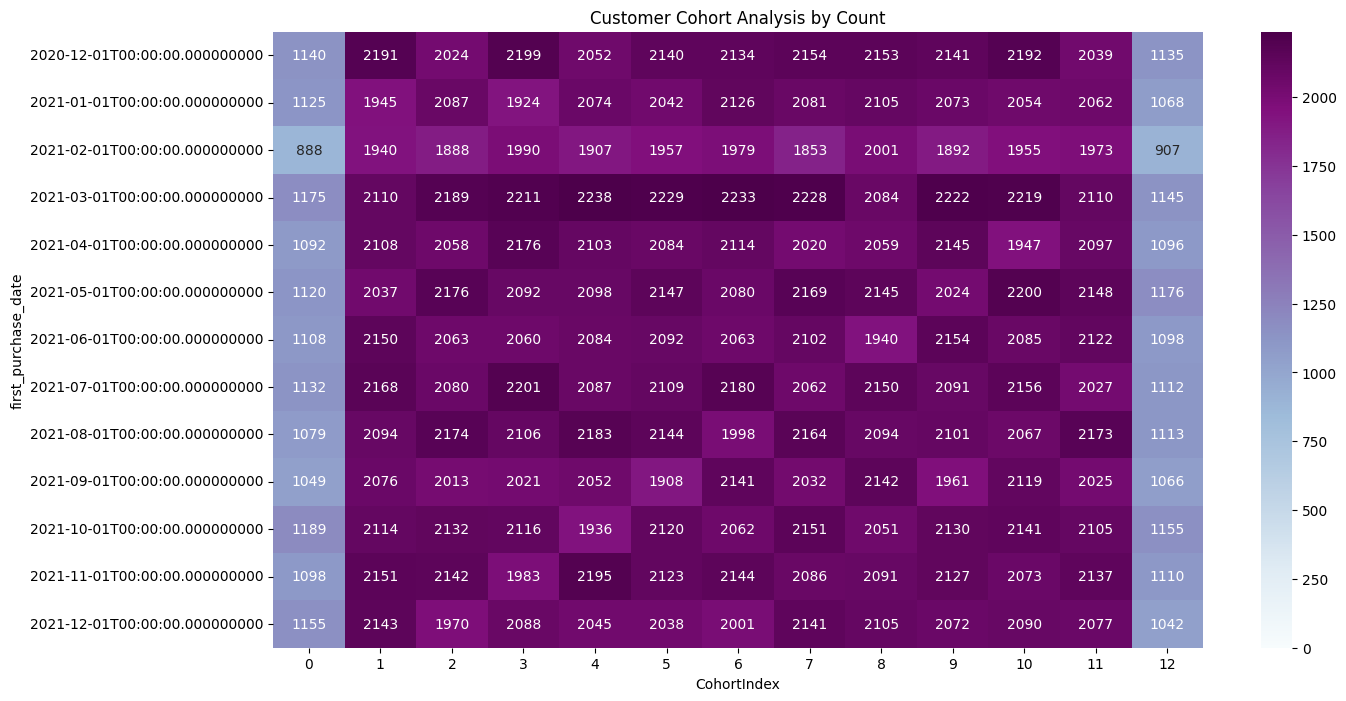

In [32]:
#각 코호트의 월별 활성과 고객수 계산 히트맵
plt.figure(figsize=(15, 8))
plt.title('Customer Cohort Analysis by Count')
sns.heatmap(data=cohort_counts,annot = True,vmin = 0.0,fmt=".0f",cmap="BuPu")
plt.show()

In [33]:
#고객 유지율
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #백분율 표시

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_date,,,,,,,,,,,,,
2020-12-01,100.0,192.2,177.5,192.9,180.0,187.7,187.2,188.9,188.9,187.8,192.3,178.9,99.6
2021-01-01,100.0,172.9,185.5,171.0,184.4,181.5,189.0,185.0,187.1,184.3,182.6,183.3,94.9
2021-02-01,100.0,218.5,212.6,224.1,214.8,220.4,222.9,208.7,225.3,213.1,220.2,222.2,102.1
2021-03-01,100.0,179.6,186.3,188.2,190.5,189.7,190.0,189.6,177.4,189.1,188.9,179.6,97.4
2021-04-01,100.0,193.0,188.5,199.3,192.6,190.8,193.6,185.0,188.6,196.4,178.3,192.0,100.4
2021-05-01,100.0,181.9,194.3,186.8,187.3,191.7,185.7,193.7,191.5,180.7,196.4,191.8,105.0
2021-06-01,100.0,194.0,186.2,185.9,188.1,188.8,186.2,189.7,175.1,194.4,188.2,191.5,99.1
2021-07-01,100.0,191.5,183.7,194.4,184.4,186.3,192.6,182.2,189.9,184.7,190.5,179.1,98.2
2021-08-01,100.0,194.1,201.5,195.2,202.3,198.7,185.2,200.6,194.1,194.7,191.6,201.4,103.2


In [34]:
cohort_size

first_purchase_date
2020-12-01    1140
2021-01-01    1125
2021-02-01     888
2021-03-01    1175
2021-04-01    1092
2021-05-01    1120
2021-06-01    1108
2021-07-01    1132
2021-08-01    1079
2021-09-01    1049
2021-10-01    1189
2021-11-01    1098
2021-12-01    1155
Name: 0, dtype: int64

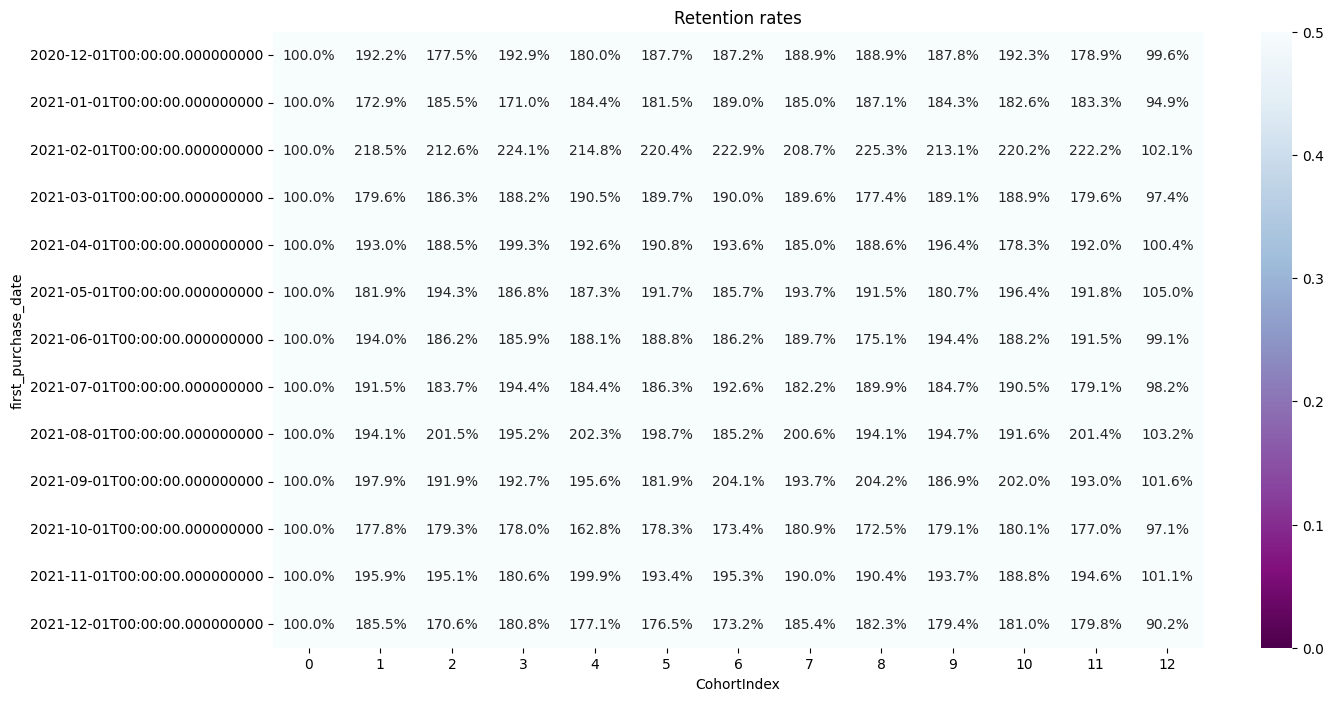

In [35]:
#고객 유지율 히트맵
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.1%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [36]:
#월별 첫 구매 기준 코호트 분석

# Ensure first_purchase_date and last_purchase_date are in datetime format
data['first_purchase_date'] = pd.to_datetime(data['first_purchase_date'], errors='coerce')
data['last_purchase_date'] = pd.to_datetime(data['last_purchase_date'], errors='coerce')

# Function to create monthly cohort table
def create_monthly_cohort(data):
    data['cohort_month'] = data['first_purchase_date'].dt.to_period('M')
    data['purchase_month'] = data['last_purchase_date'].dt.to_period('M')
    cohort_data = data.groupby(['cohort_month', 'purchase_month'])['id'].nunique().unstack(0).fillna(0)
    cohort_sizes = cohort_data.iloc[0]
    cohort_table = cohort_data.divide(cohort_sizes, axis=1) * 100
    return cohort_table

# Generate the monthly cohort
monthly_cohort = create_monthly_cohort(data)


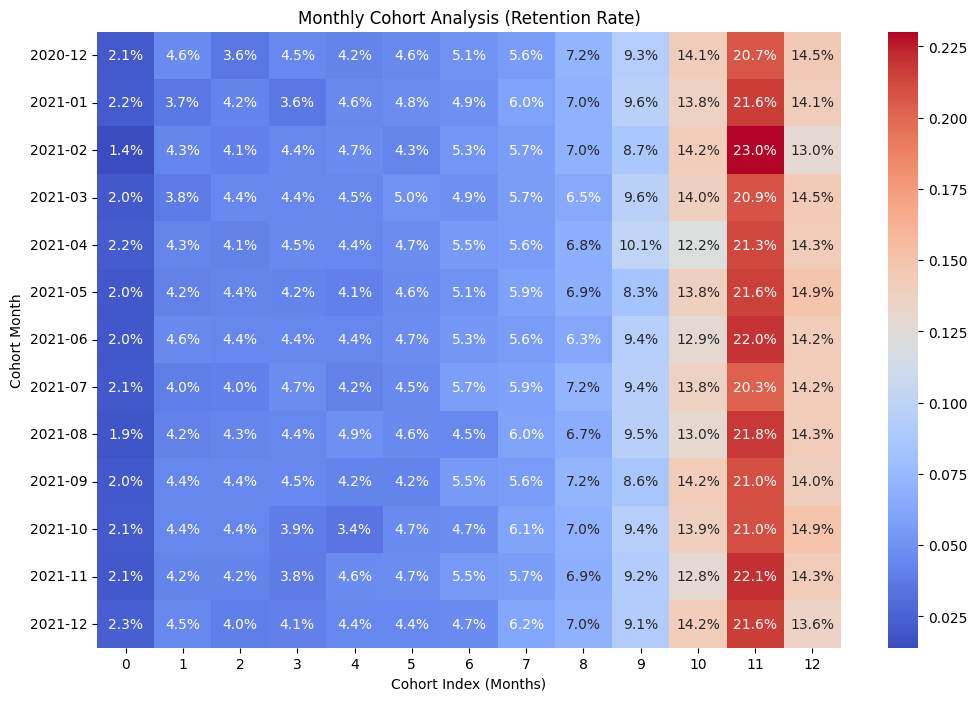

In [37]:
#Monthly Cohort Analysis (Retention Rate)

# Step 1: Cohort Month 및 Cohort Index 계산
data['cohort_month'] = data['first_purchase_date'].dt.to_period('M')
data['purchase_month'] = data['last_purchase_date'].dt.to_period('M')
data['cohort_index'] = (data['purchase_month'] - data['cohort_month']).apply(lambda x: x.n)

# Step 2: Cohort별 초기 고객 수 계산
cohort_sizes = data.groupby('cohort_month')['id'].nunique()

# Step 3: Retention Rate 계산
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['id'].nunique().reset_index()
cohort_data['retention_rate'] = cohort_data.apply(
    lambda row: row['id'] / cohort_sizes[row['cohort_month']], axis=1
)

# Step 4: Pivot Table 생성
monthly_cohort = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='retention_rate')

# Step 5: 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_cohort, annot=True, fmt=".1%", cmap="coolwarm", cbar=True)
plt.title("Monthly Cohort Analysis (Retention Rate)")
plt.xlabel("Cohort Index (Months)")
plt.ylabel("Cohort Month")
plt.show()


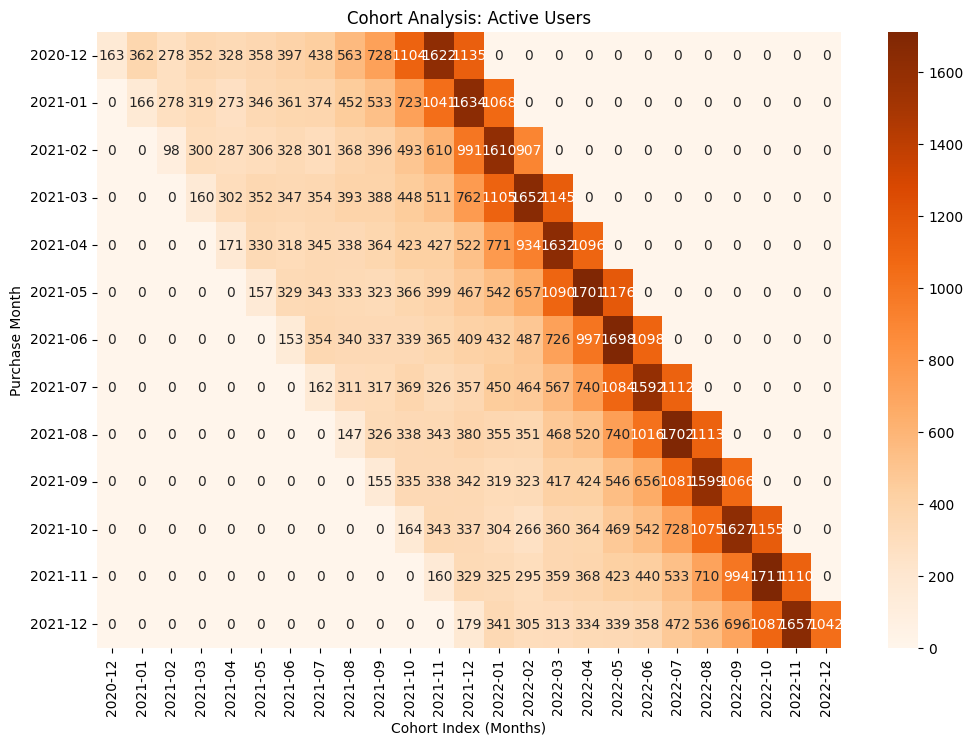

In [38]:
#활성 사용자 분석 - 특정 기간 동안 각 코호트의 활성 사용자 비율 계산
active_users = data.groupby(['cohort_month', 'purchase_month'])['id'].nunique().reset_index()

# Pivot Table
active_user_matrix = active_users.pivot(index='cohort_month', columns='purchase_month', values='id').fillna(0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(active_user_matrix, annot=True, fmt=".0f", cmap="Oranges", cbar=True)
plt.title("Cohort Analysis: Active Users")
plt.xlabel("Cohort Index (Months)")
plt.ylabel("Purchase Month")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27936\1832799036.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lifetime_heatmap = data.pivot_table(index='lifetime_bin', values='id', aggfunc='count', fill_value=0)


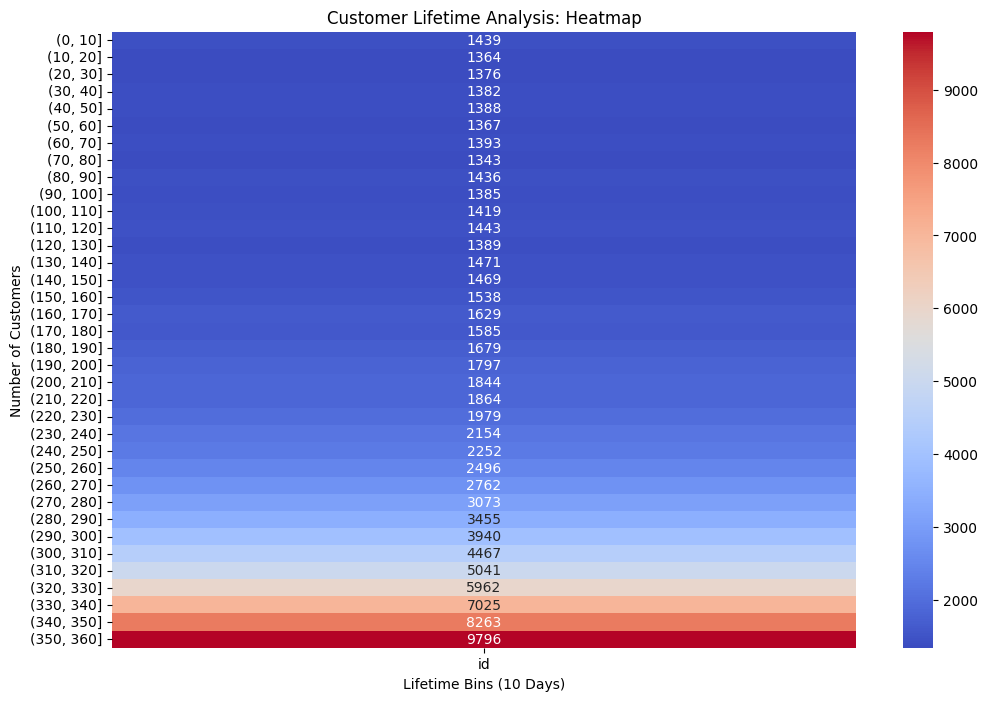

In [39]:
# 고객 생애주기 분석

# Step 1: 데이터 준비
data['lifetime_days'] = (data['last_purchase_date'] - data['first_purchase_date']).dt.days

# Step 2: 히트맵을 위한 2차원 데이터 생성
data['lifetime_bin'] = pd.cut(data['lifetime_days'], bins=range(0, 370, 10))  # 0~360일, 10일 단위

# Grouping and creating a pivot table
lifetime_heatmap = data.pivot_table(index='lifetime_bin', values='id', aggfunc='count', fill_value=0)

# Step 3: 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(lifetime_heatmap, annot=True, fmt=".0f", cmap="coolwarm", cbar=True)
plt.title("Customer Lifetime Analysis: Heatmap")
plt.xlabel("Lifetime Bins (10 Days)")
plt.ylabel("Number of Customers")
plt.show()

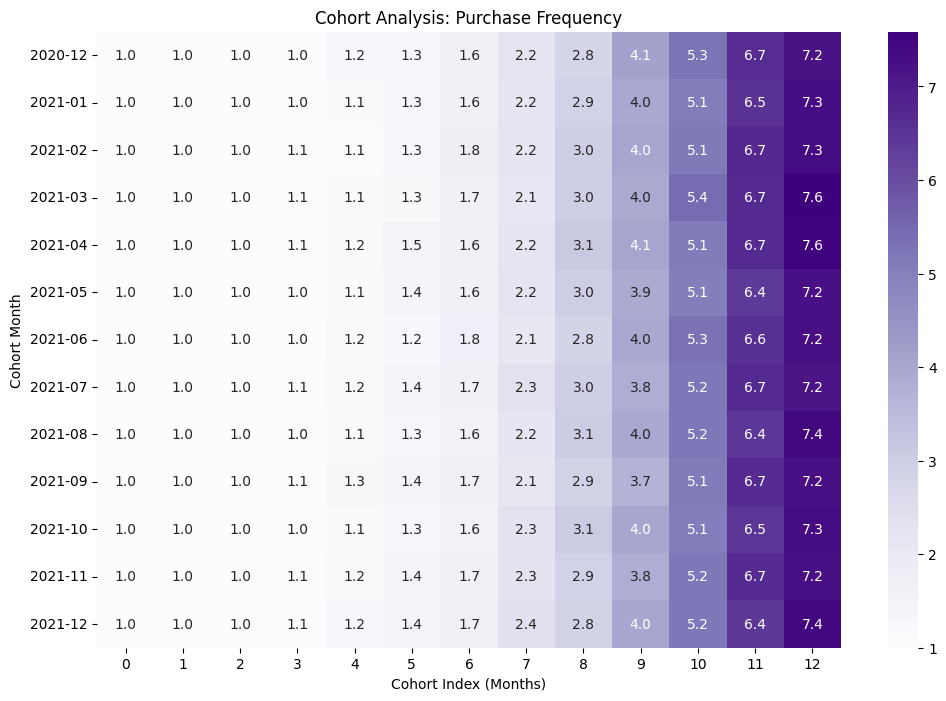

In [40]:
#구매 빈도 분석 - 고객이 특정 기간 동안 얼마나 자주 구매했는지
# Step 1: 구매 횟수 계산
data['purchase_count'] = data['purchase_dates'].apply(lambda x: len(x.split(', ')))

# Step 2: Cohort Index 생성 (각 코호트에서의 상대적 기간)
data['cohort_month'] = data['first_purchase_date'].dt.to_period('M')  # Cohort 기준 월
data['purchase_month'] = data['last_purchase_date'].dt.to_period('M')  # 구매 기준 월
data['cohort_index'] = (data['purchase_month'] - data['cohort_month']).apply(lambda x: x.n)

# Step 3: 평균 구매 횟수 계산
cohort_frequency = data.groupby(['cohort_month', 'cohort_index'])['purchase_count'].mean().reset_index()

# Step 4: Pivot Table 생성
frequency_matrix = cohort_frequency.pivot_table(index='cohort_month', columns='cohort_index', values='purchase_count')

# Step 5: 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_matrix, annot=True, fmt=".1f", cmap="Purples", cbar=True)
plt.title('Cohort Analysis: Purchase Frequency')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()


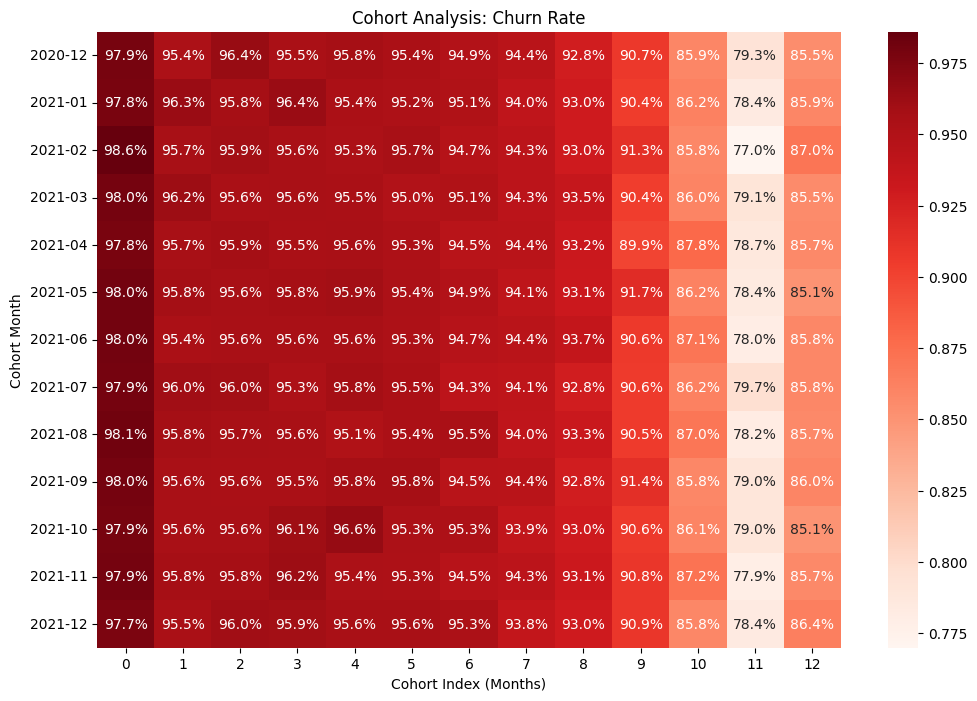

In [41]:
#고객 이탈 분석 

# Step 1: Cohort Month 및 Cohort Index 계산
data['cohort_month'] = data['first_purchase_date'].dt.to_period('M')
data['purchase_month'] = data['last_purchase_date'].dt.to_period('M')
data['cohort_index'] = (data['purchase_month'] - data['cohort_month']).apply(lambda x: x.n)

# Step 2: Cohort별 초기 고객 수 계산
cohort_sizes = data.groupby('cohort_month')['id'].nunique()

# Step 3: Retention Rate 계산
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['id'].nunique().reset_index()
cohort_data['retention_rate'] = cohort_data.apply(
    lambda row: row['id'] / cohort_sizes[row['cohort_month']], axis=1
)

# Step 4: Churn Rate 계산
cohort_data['churn_rate'] = 1 - cohort_data['retention_rate']

# Step 5: Pivot Table 생성
churn_matrix = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='churn_rate')

# Step 6: 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(churn_matrix, annot=True, fmt=".1%", cmap="Reds", cbar=True)
plt.title('Cohort Analysis: Churn Rate')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()

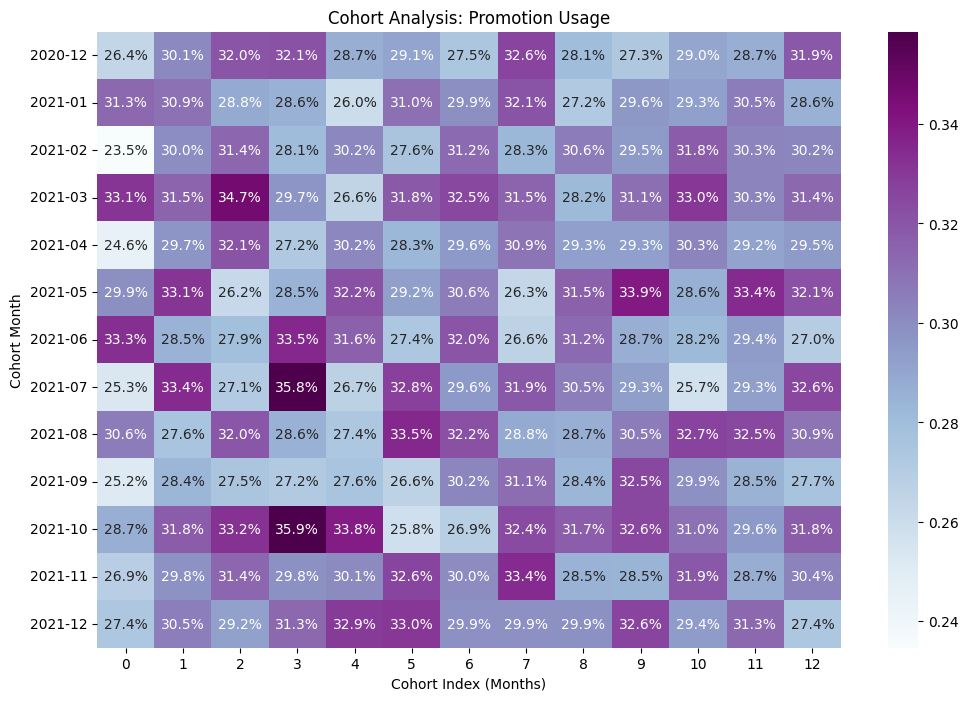

In [42]:
#프로모션 사용 분석 - 각 코호트에서 프로모션 사용 비율 분석, 프로모션 사용의 열의 평균 값 계산

# Step 1: Cohort Month 및 Cohort Index 계산
data['cohort_month'] = data['first_purchase_date'].dt.to_period('M')
data['purchase_month'] = data['last_purchase_date'].dt.to_period('M')
data['cohort_index'] = (data['purchase_month'] - data['cohort_month']).apply(lambda x: x.n)

# Step 2: 프로모션 사용 비율 계산
# 프로모션 사용 여부를 0과 1로 변환 (필요 시)
data['promotion_usage'] = data['promotion_usage'].apply(lambda x: 1 if x > 0 else 0)

# 각 코호트에서 프로모션 사용 비율 계산
promo_usage = data.groupby(['cohort_month', 'cohort_index'])['promotion_usage'].mean().reset_index()

# Step 3: Pivot Table 생성
promo_matrix = promo_usage.pivot_table(index='cohort_month', columns='cohort_index', values='promotion_usage')

# Step 4: 프로모션 사용 분석 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(promo_matrix, annot=True, fmt=".1%", cmap="BuPu", cbar=True)
plt.title('Cohort Analysis: Promotion Usage')
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()